In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cymr import lba

In [2]:
# set times and responses to evaluate
n = 100  # number of times
m = 24  # number of choices
k = 3  # number of parameter values to test
t = np.tile(np.linspace(0, 4, n), m)
r = np.repeat(range(m), n).astype('int32')
demo = np.repeat(range(3), n * m)
df = pd.DataFrame({'rt': np.tile(t, k), 'response': np.tile(r, k),
                   'demo': demo, 'pdf': np.zeros(n * m * k)})

In [3]:
df

,rt,response,demo,pdf
0,0.000000,0,0,0.0
1,0.040404,0,0,0.0
2,0.080808,0,0,0.0
3,0.121212,0,0,0.0
4,0.161616,0,0,0.0
...,...,...,...,...
7195,3.838384,23,2,0.0
7196,3.878788,23,2,0.0
7197,3.919192,23,2,0.0
7198,3.959596,23,2,0.0


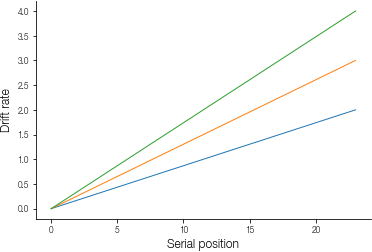

In [4]:
v_mat = np.vstack((np.linspace(0, 2, 24),
                   np.linspace(0, 3, 24),
                   np.linspace(0, 4, 24)))
fig, ax = plt.subplots()
h = ax.plot(v_mat.T)
h = ax.set_xlabel('Serial position')
h = ax.set_ylabel('Drift rate')

In [5]:
%%time
A = 5
b = 10
s = 1
tau = 0
pdf = np.zeros((r.size, t.size))
for i, t_samp in enumerate(t):
    for j, r_samp in enumerate(t):
        pdf[j, i] = lba.response_pdf(t_samp, r_samp, A, b, v_mat[0], s)

CPU times: user 19.3 s, sys: 34.5 ms, total: 19.3 s
Wall time: 19.4 s


In [6]:
19.4 / 7200

0.002694444444444444

In [13]:
30 * 15 * .0027

1.215

In [7]:
v_max = [2, 3, 4]
for i, v in enumerate(v_mat):
    for j, t_samp in enumerate(np.linspace(0, 4, n)):
        for k, r_samp in enumerate(range(m)):
            include = (df['demo'] == i) & (df['rt'] == t_samp) & (df['response'] == r_samp)
            df.loc[include, 'demo'] = f'vmax={v_max[i]}'
            df.loc[include, 'pdf'] = lba.response_pdf(t_samp, r_samp, A, b, v, s)

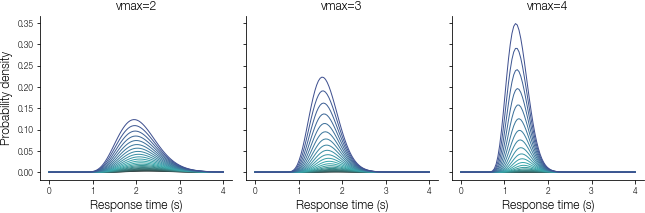

In [11]:
g = sns.FacetGrid(df, col='demo', hue='response', 
                  palette=sns.color_palette('mako_d', 24))
g = (g.map_dataframe(sns.lineplot, x='rt', y='pdf')
      .set_titles('{col_name}')
      .set_xlabels('Response time (s)')
      .set_ylabels('Probability density'))